# Extract Data
Raw data from simulations are stored in pickle files which can be extracted into a Python dictionary as demonstrated below.

In [1]:
import os
import pickle
import numpy as np

In [2]:
from utility import display as di

os.chdir("../data/7-7-det")

In [3]:
sample_filename = "data-7-7-man-liv-det-1.0-b-0.001-Z.pickle"

In [4]:
def load_data_from_file(filename):
    """
    Simple function to load the dictionary from the pickle filename provided.
    :param filename: filename (current directory or full path) of the pickle data file
    :return: data_dict : python dictionary extracted from the pickle file
    """
    try:
        infile = open(filename, 'rb')
        indict = pickle.load(infile)
        print(filename, "loaded", flush=True)
        print('directory: {}'.format(os.getcwd()), flush=True)
        return indict
    except FileNotFoundError:
        print("File {} not found, exiting.".format(filename), flush=True)
        exit(1)
    except Exception as inst:
        print("exception: ", type(inst))
        print("args:", inst.args)
        print(inst, ", exiting.")
        exit(1)

In [5]:
# standard loop to load pickle file
with open(sample_filename, 'rb') as infile:
    object_file = pickle.load(infile)
# or one liner
# object_file = pickle.load(open(sample_filename, "rb"))

* load dictionary from pickle file

In [6]:
data_dict = load_data_from_file(sample_filename)

data-7-7-man-liv-det-1.0-b-0.001-Z.pickle loaded
directory: /home/karen/workspace/cognitive-geometry/data/7-7-det


* extract model information from the pickle file - to recreate the grid environment

In [7]:
env = data_dict['env'] # gridworld parameters
shape = data_dict['shape'] # shape of the grid world
theta = data_dict['theta'] # threshold for convergence
beta = data_dict['beta'] # trade-off parameter
state_dist = data_dict['state_dist'] # state distribution object used in the simulation

* extract the simulation output

In [8]:
infos = data_dict['infos'] # decision information values
frees = data_dict['frees'] # free energy values
policies = data_dict['policies'] # corresponding free energy optimal policies


* plot the decision information values and optimal free energy policy for a particular goal state

<AxesSubplot:>

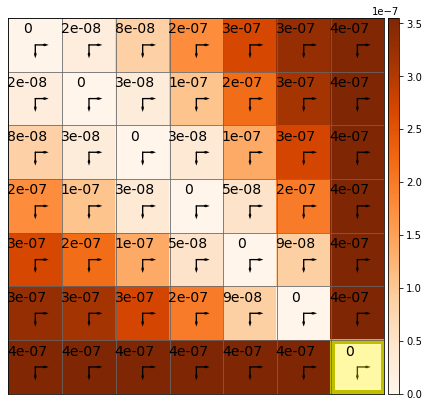

In [9]:
env.update_dynamics_for_goals([48])
di.plot_quiver_heatmap_var(env, infos[48].astype(float), policies[48], label=True)